### adverserial validation : 
calculating similarities between train and test sets to prevent the model from overfitting.
if the train differes significantly from test set, that means the model will not perform will on the test set. this might be due to many factors like the train set may have unwanted noise or the scale of values in the train set might be different from the test set(price may be in us dollers in train set and in rupees in test set), etc. 

so, inorder to prevent the model from overfitting, we use roc-auc test to see by how much the train set differs from the test set. 

In [109]:
# Here, we drop the actual target column from the training dataset.

# Create a label column in both datasets (0 for the train data and 1 for the test data or vice versa).

# Then we combine the training and the test dataset.

# Now, we use a binary classifier to see if we are able to differentiate between the training and test samples.

# Now, we evaluate the AUC ROC(area under receiver operating characteristic curve) score, i.e., the Area Under the Curve for Receiver Operating Characteristic Graph.

In [110]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [111]:
# loading the dataset

columns = pd.read_csv('./train.csv', nrows=1).select_dtypes("number").columns
train_set = pd.read_csv('./train.csv',usecols=columns) #for simplicity we are only importing numerical columns

columns = pd.read_csv('./test.csv', nrows=1).select_dtypes("number").columns
test_set = pd.read_csv('./test.csv',usecols=columns) #for simplicity we are only importing numerical columns

In [112]:
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [113]:
train_set.drop(columns = ['Cabin'], inplace = True)
train_set.Age=train_set.Age.fillna(train_set.Age.mean())
train_set.Fare=train_set.Fare.fillna(train_set.Fare.mode())

In [114]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [115]:
test_set.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,34.5,0,0,330911,7.8292,NaN
1,893,3,47.0,1,0,363272,7.0000,NaN
2,894,2,62.0,0,0,240276,9.6875,NaN
3,895,3,27.0,0,0,315154,8.6625,NaN
4,896,3,22.0,1,1,3101298,12.2875,NaN


In [116]:
test_set.drop(columns = ['Cabin', 'Ticket'], inplace = True)
test_set.Age=test_set.Age.fillna( test_set.Age.mean())
test_set.Fare=test_set.Fare.fillna(test_set.Fare.mode())

In [117]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [118]:
# removing target feature from the train set
new_trainset = train_set.drop(columns = ['Survived'])

# including new column  to both train and test sets for identification
new_trainset['identify'] = 0
new_testset = test_set
new_testset['identify'] = 1

In [119]:
new_trainset.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,identify
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,0


In [120]:
new_testset.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,identify
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,1
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,1


In [121]:
# merging both train and test sets
df = pd.concat([new_trainset, new_testset], axis = 0, ignore_index=True)
# shuffle
df = df.sample(frac = 1)

In [122]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,identify
839,840,1,29.699118,0,0,29.70,0
212,213,3,22.000000,0,0,7.25,0
196,197,3,29.699118,0,0,7.75,0
892,893,3,47.000000,1,0,7.00,1
1302,1303,1,37.000000,1,0,90.00,1


In [123]:
# training random forest model with whole data
x = df.drop('identify', axis = 1)
y = df.identify

clf = RandomForestClassifier(random_state=1, n_estimators=150, max_depth=2, class_weight='balanced')
clf.fit(x, y)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
auc_score = roc_auc_score(y, clf.predict_proba(x)[:,1])
auc_score

1.0

if auc_score ~ 0.5, then both the train and test sets are similar

if auc_score > 0.5, then train set and test set are not similar

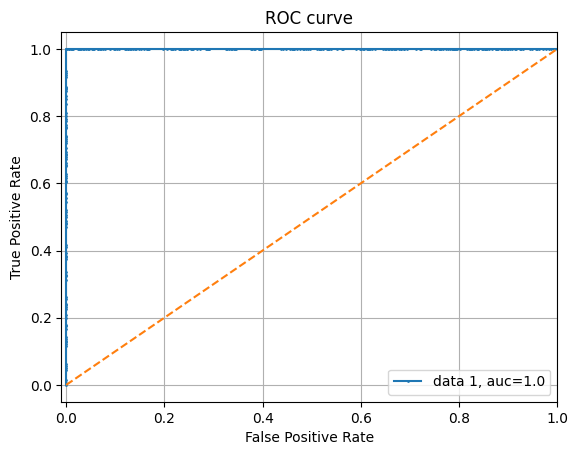

In [ ]:
def plot_roc(y_trues, y_preds, x_max=1.0):
    fig, ax = plt.subplots()
    # for i, y_pred in enumerate(y_preds):
        # y_true = y_trues[i]
    fpr, tpr, thresholds = roc_curve(y_trues, y_preds)
    auc = roc_auc_score(y_trues, y_preds)
    ax.plot(fpr, tpr, label="data 1, auc="+str(auc_score), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

plot_roc(y.values, clf.predict_proba(x)[:,1])

In [ ]:
# we can see that auc_score = 1.0, which means that the model is correctly able to identify the difference between train and test sets.(which means train and test sets are not similar)

# now, we will look at the feature importances to know which feature is the most important
feature_importance_random_forest = pd.DataFrame({'features' : x.columns, 'RF values' : clf.feature_importances_}) 
feature_importance_random_forest = feature_importance_random_forest.sort_values(by = 'RF values', ascending = False)
feature_importance_random_forest

,features,RF values
0,PassengerId,0.653426
5,Fare,0.086752
3,SibSp,0.084519
2,Age,0.083333
4,Parch,0.062734
1,Pclass,0.029236


here, 'PassengerId' plays very important role in the classification(~66%) but we don't need this feature for classification

In [ ]:
# so, we will now remove 'PassengerId' column and fit again
x=x.drop('PassengerId', axis = 1)
clf.fit(x, y)

auc_score = roc_auc_score(y, clf.predict_proba(x)[:, 1])
auc_score

0.7591733389181555

here, auc_score(0.73) is near to 0.5 so we can say that test set is now more similar to train set than before

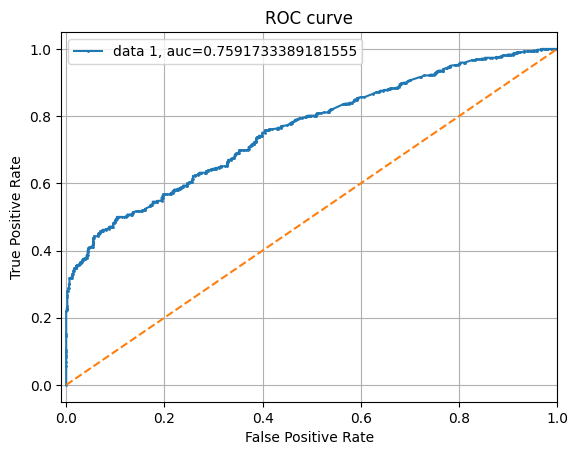

In [ ]:
def plot_roc(y_trues, y_preds, x_max=1.0):
    fig, ax = plt.subplots()
    # for i, y_pred in enumerate(y_preds):
        # y_true = y_trues[i]
    fpr, tpr, thresholds = roc_curve(y_trues, y_preds)
    auc = roc_auc_score(y_trues, y_preds)
    ax.plot(fpr, tpr, label="data 1, auc="+str(auc_score), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

plot_roc(y.values, clf.predict_proba(x)[:,1])

In [ ]:
feature_importance_random_forest = pd.DataFrame({'features' : x.columns, 'RF values' : clf.feature_importances_}) 
feature_importance_random_forest = feature_importance_random_forest.sort_values(by = 'RF values', ascending = False)
feature_importance_random_forest

,features,RF values
1,Age,0.238346
4,Fare,0.223206
2,SibSp,0.213602
3,Parch,0.202119
0,Pclass,0.122727


in this case, the feature importances are not biased like before


what to do when train set differs from test set?

    drop those columns that are not useful for prediction but are useful for classifying between train and test set(for example, we droppend 'PassengerId' as its not useful for model prediction but useful for classifying between train and test set)

if the train set still not similar to the test set(i.e., roc auc score != ~0.5), then do the following : 

    sort the training data by the probability of it being in the test set and use top 20% as validation set.

In [140]:
final = train_set.copy()  #original train set
tempx = final.drop(columns = ['PassengerId', 'Survived'])
tempy = final.Survived

clf.fit(tempx, tempy)

final['predict_proba'] = clf.predict_proba(tempx)[:,1]

# sort the values by 'predict_proba'
final = final.sort_values(by = 'predict_proba', ascending = False)

# we will take top 20% as the validation set and rest of the data as the new training set]
nrows = final.shape[0]
adverserial_validation_set = final[:int(nrows*0.2)] # this validation set is the most similar to the test set.
adverserial_train_set = final[int(nrows*0.2) : ]

adverserial_validation_set.drop(columns = ['predict_proba'], inplace = True)
adverserial_train_set.drop(columns = ['predict_proba'], inplace = True)

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_9276\3609369715.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adverserial_validation_set.drop(columns = ['predict_proba'], inplace = True)
C:\Users\RAJESH\AppData\Local\Temp\ipykernel_9276\3609369715.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adverserial_train_set.drop(columns = ['predict_proba'], inplace = True)


In [142]:
adverserial_validation_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
305,306,1,1,0.92,1,2,151.5500
297,298,0,1,2.00,1,2,151.5500
445,446,1,1,4.00,0,2,81.8583
802,803,1,1,11.00,1,2,120.0000
435,436,1,1,14.00,1,2,120.0000


In [143]:
adverserial_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
440,441,1,2,45.000000,1,1,26.25
298,299,1,1,29.699118,0,0,30.50
766,767,0,1,29.699118,0,0,39.60
270,271,0,1,29.699118,0,0,31.00
632,633,1,1,32.000000,0,0,30.50
